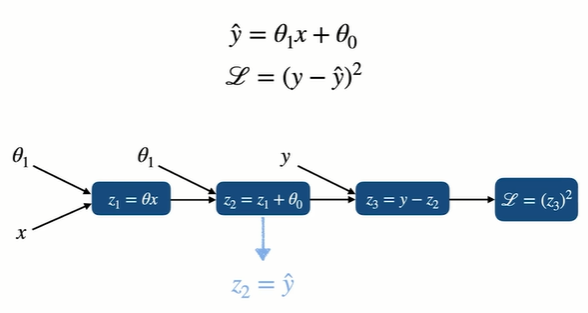

# Dataset Preparation

In [8]:
# basic_nodes
class plus_node:
  def __init__(self):
    self._x, self._y = None, None
    self._z = None
      
  def forward(self,x,y):
    self._x, self._y = x, y
    self._z = self._x + self._y
    return self._z
  
  def backward(self, dz): # dz = dJ/dz
    return dz*1,dz*1 #dJ/dx= dJ/dz * dz/dx, dJ/dy

class minus_node:
  def __init__(self):
    self._x, self._y = None, None
    self._z = None

  def forward(self, x, y):
    self._x, self._y = x, y
    self._z = self._x - self._y
    return self._z

  def backward(self, dz):
    return 1*dz, -1*dz

class mul_node:
  def __init__(self):
    self._x, self._y = None, None
    self._z = None

  def forward(self, x, y):
    self._x , self._y = x, y
    self._z = self._x * self._y
    return self._z

  def backward(self, dz):
    return dz*self._y, dz*self._x # dJ/dz * dz/dx, dJ/dy

class square_node:
  def __init__(self):
    self._x = None
    self._z = None

  def forward(self, x):
    self._x = x
    self._z = self._x * self._x
    return self._z

  def backward(self, dz):
    return dz*(2*self._x)

class mean_node:
  def __init__(self):
    self._x = None
    self._z = None

  def forward(self, x):
    self._x = x
    self._z = np.mean(self._x) # z = 1/n *(x1+x2+...+xn)
    return self._z

  def backward(self, dz):
    dx = dz*1/len(self._x)*np.ones_like(self._x) # dJ/dx1 = dJ/dz * dz/dx1 = dJ/dz * (1/n)
    return dx

In [2]:
class dataset_generator:
  def __init__(self, feature_dim = 1, n_sample = 100, noise = 0):
    self._feature_dim = feature_dim
    self._n_sample = n_sample
    self._noise = noise

    self._coefficient = None
    self._init_set_coefficient()

  def _init_set_coefficient(self):
    self._coefficient = [1 for _ in range(self._feature_dim)] + [0]  # weights + bias

  def set_n_sample(self, n_sample):
    self._n_sample = n_sample 

  def set_noise(self, noise):
    self._noise = _noise

  def set_coefficient(self, coefficient_list):
     self._coefficient = coefficient_list

  def make_dataset(self):
    x_data = np.random.normal(0, 1, size = (self._n_sample,
                                            self._feature_dim))
    y_data = np.zeros(shape = (self._n_sample, 1))
    for feature_idx in range(self._feature_dim):
      y_data += self._coefficient[feature_idx] * x_data[:,feature_idx].reshape(-1,1)
    y_data += self._coefficient[-1] # bias
    y_data += self._noise*np.random.normal(0,1,size=(self._n_sample, 1))

    return x_data, y_data

  def dataset_visualizer(self):
    if self._feature_dim == 1:
      plt.style.use('seaborn')

      fig, ax = plt.subplots(figsize=(10,10))
      ax.plot(x_data, y_data, 'bo',
              alpha=0.3,
              markersize=20)
      ax.tick_params(axis='both',
                     labelsize=30)
      ax.set_title("Dataset", fontsize=40, color='darkred')
      ax.set_xlabel('X data', fontsize=30, alpha=0.6)
      ax.set_ylabel('Y data', fontsize=30, alpha=0.6)

    else:
      class feature_dim_error(Exception):
        pass
      raise feature_dim_error("Visualization is valid for only feature_dim == 1")

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use('seaborn')
np.random.seed(0)

In [7]:
dataset_gen = dataset_generator()
dataset_gen.set_coefficient([5,2]) # y=5x+2
x_data, y_data = dataset_gen.make_dataset() # (100, 1) (100, 1)
data = np.hstack((x_data, y_data)) # (100, 2)

# Model/Loss Setting

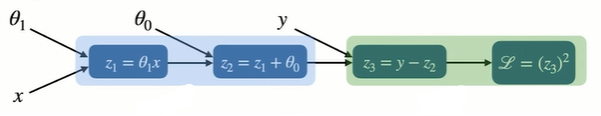

In [9]:
# model implementation
node1 = mul_node()
node2 = plus_node()

# square loss implementation
node3 = minus_node()
node4 = square_node()

# Learning

In [15]:
th1, th0 = 1, 0
lr = 0.01
epochs = 2

th1_list, th0_list = [], []
loss_list = []

for epoch in range(epochs):
  for data_idx, (x,y) in enumerate(data):
    # forward propagation
    z1 = node1.forward(th1, x)
    z2 = node2.forward(z1, th0)
    z3 = node3.forward(y, z2)
    l = node4.forward(z3)

    # backward propagation
    dz3 = node4.backward(1) # dl/dz3
    dy, dz2 = node3.backward(dz3)
    dz1, dth0 = node2.backward(dz2)
    dth1, dx = node1.backward(dz1)

    # update
    th1 = th1 - lr*dth1
    th0 = th0 - lr*dth0

    th1_list.append(th1)
    th0_list.append(th0)
    loss_list.append(l)

# Result Visualization

Text(0.5, 1.0, '$\\theta_{1}, \\theta_{0}$')

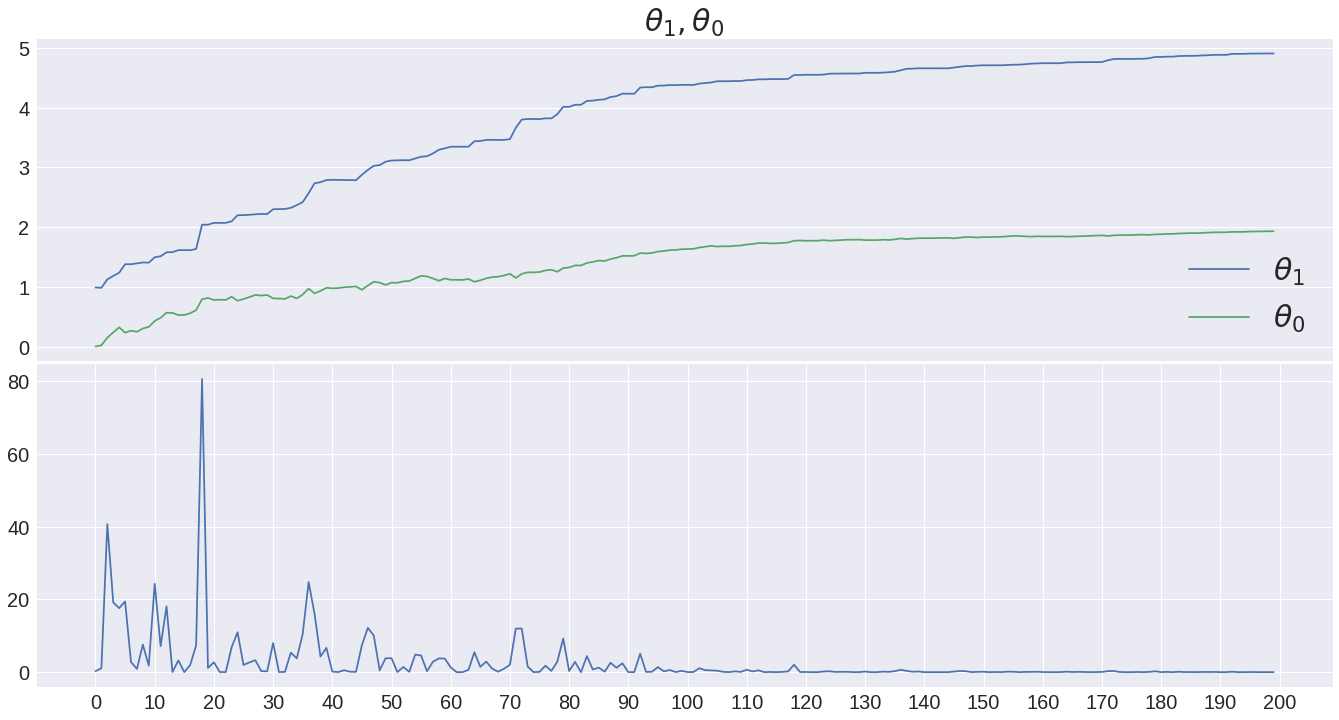

In [16]:
fig, ax = plt.subplots(2,1, figsize=(20,10))
ax[0].plot(th1_list, label = r'$\theta_{1}$')
ax[0].plot(th0_list, label = r'$\theta_{0}$')
ax[1].plot(loss_list)

fig.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95,
                    hspace=0.01)
ax[0].legend(loc='lower right', fontsize=30)
ax[0].axes.get_xaxis().set_visible(False)
ax[0].tick_params(axis='both', labelsize=20)
ax[1].tick_params(axis='both', labelsize=20)

x_ticks = np.arange(0, len(th1_list)+1, 10)
y_ticks = np.arange(0,6)
ax[1].set_xticks(x_ticks)
ax[0].set_yticks(y_ticks)

ax[0].set_title(r'$\theta_{1}, \theta_{0}$', fontsize=30)